<a href="https://colab.research.google.com/github/Sudhir956020/DL_CNN/blob/main/CNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
car_img_path="/content/car.jpeg"

# New section

In [2]:
car_img_path

'/content/car.jpeg'

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2#opencv

In [4]:
cv2.imread(car_img_path)

array([[[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       [[237, 237, 237],
        [237, 237, 237],
        [237, 237, 237],
        ...,
        [237, 237, 237],
        [237, 237, 237],
        [237, 237, 237]],

       ...,

       [[216, 216, 216],
        [216, 216, 216],
        [216, 216, 216],
        ...,
        [211, 211, 211],
        [211, 211, 211],
        [211, 211, 211]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [213, 213, 213],
        [213, 213, 213],
        [213, 213, 213]],

       [[217, 217, 217],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [214, 214, 214],
        [214, 214, 214]]

In [5]:
img=cv2.imread(car_img_path)

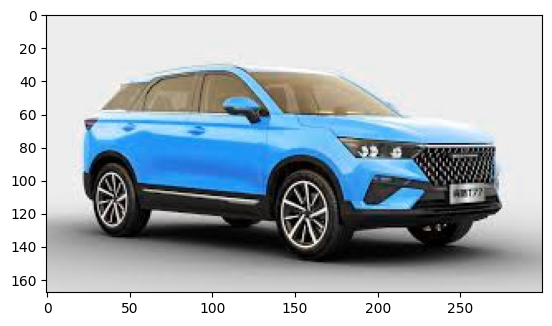

In [6]:
plt.imshow(img)

In [7]:
img2=cv2.cvtColor(img,cv2. COLOR_BGR2RGB)

In [8]:
img2.shape

(168, 300, 3)

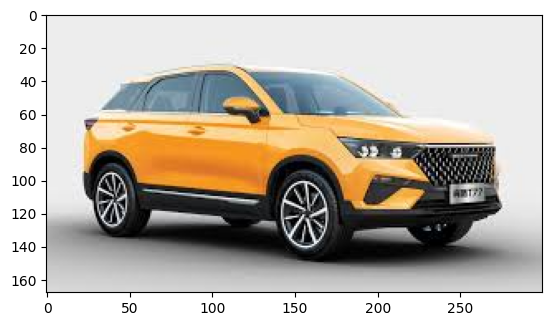

In [9]:
plt.imshow(img2)

In [10]:
img3=cv2.cvtColor(img,cv2. COLOR_BGR2GRAY)

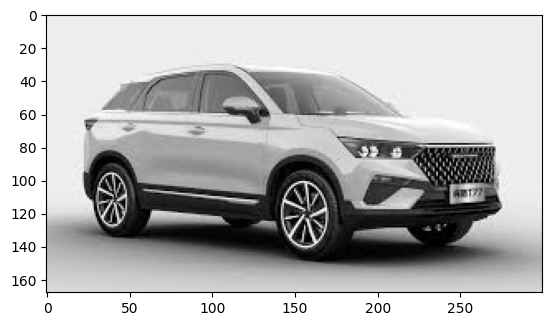

In [11]:
plt.imshow(img3,cmap="gray")

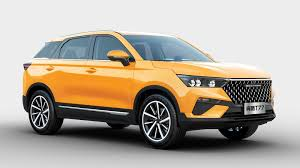

In [12]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [13]:
img3.shape

(168, 300)

In [14]:
row,col=img3.shape

In [15]:
car=img3.reshape(1,row,col,1)

In [16]:
car.shape

(1, 168, 300, 1)

In [17]:
Conv_layer=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=car.shape[1:]
)]

In [19]:
conv_model=tf.keras.Sequential(Conv_layer)

In [20]:
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10 (40.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
output=conv_model.predict(car)

1/1 [==============================] - 8s 8s/step


In [22]:
output.shape

(1, 166, 298, 1)

In [23]:
row,col=output.shape[1:-1]

In [24]:
reshaped_output=output.reshape(row,col)

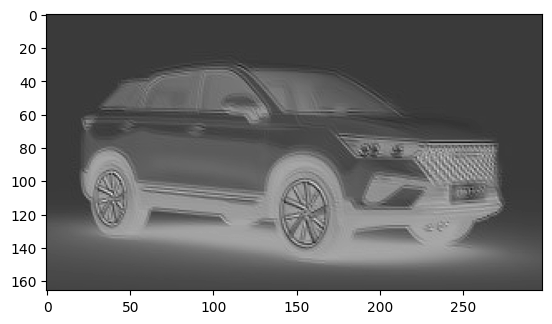

In [25]:
plt.imshow(reshaped_output,cmap="gray")

In [26]:
row,col,depth=img2.shape

In [27]:
color_car=img2

In [28]:
reshaped_color_img=color_car.reshape(1,row,col,depth)

In [29]:
reshaped_color_img.shape

(1, 168, 300, 3)

In [30]:
reshaped_color_img.shape[1:]

(168, 300, 3)

In [31]:
CONV_LAYER=[tf.keras.layers.Conv2D(
    filters=1,
    kernel_size=(3,3),
    strides=(1,1),
    input_shape=reshaped_color_img.shape[1:]
)]

In [32]:
conv_model=tf.keras.Sequential(CONV_LAYER)

In [33]:
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28 (112.00 Byte)
Trainable params: 28 (112.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
color_output=conv_model.predict(reshaped_color_img)

1/1 [==============================] - 0s 89ms/step


In [35]:
color_output.shape

(1, 166, 298, 1)

In [36]:
row,col=color_output.shape[1:-1]

In [37]:
reshaped_out=color_output.reshape(row,col)

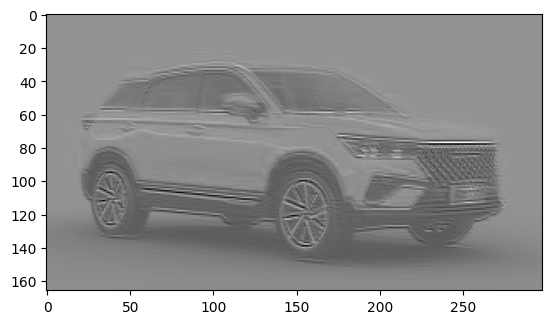

In [38]:
plt.imshow(reshaped_out,cmap="gray")

In [39]:
color_car.shape

(168, 300, 3)

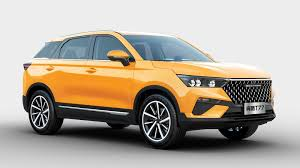

In [40]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [41]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [42]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img,grayscale=False)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size, strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [43]:
result=max_pooling(color_car)

In [44]:
result

<tf.Tensor: shape=(1, 84, 150, 3), dtype=uint8, numpy=
array([[[[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        [[237, 237, 237],
         [237, 237, 237],
         [237, 237, 237],
         ...,
         [237, 237, 237],
         [237, 237, 237],
         [237, 237, 237]],

        ...,

        [[213, 213, 213],
         [213, 213, 213],
         [213, 213, 213],
         ...,
         [207, 207, 207],
         [207, 207, 207],
         [207, 207, 207]],

        [[216, 216, 216],
         [216, 216, 216],
         [216, 216, 216],
         ...,
         [211, 211, 211],
         [211, 211, 211],
         [211, 211, 211]],

        [[217, 217, 217],
         [217, 217, 217],
         [217, 217,

In [45]:
#tensor
result.shape

TensorShape([1, 84, 150, 3])

In [46]:
def plot(result):
  _,row,col,_=result.shape
  reshaped_img=tf.reshape(result,(row,col,3))
  plt.imshow(reshaped_img)

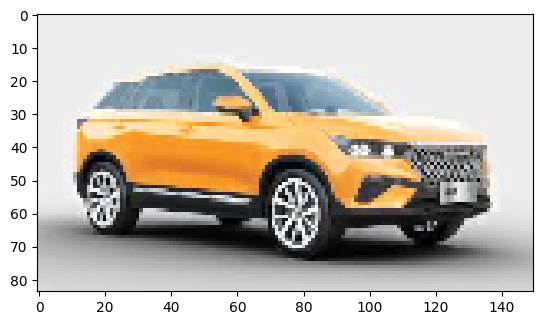

In [47]:
plot(result)

In [48]:
min,avg,globalpooling

NameError: ignored

In [49]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [50]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [51]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1) # grayscale
    return img
  row,col,depth = img.shape
  color_img = img.reshape(1,row,col,depth) # colored
  return color_img

In [53]:
def get_conv_model(filters=1, filter_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                      kernel_size=filter_size,
                                      strides=(1,1),
                                      input_shape=input_shape,
                                      padding=padding)]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [56]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    row, col, depth = out.shape[1:]
    reshape_out = out.reshape(row, col, depth)

    for d in range(depth):
      plt.imshow(reshape_out[:,:,d], cmap="gray")
      plt.show()

  except Exception as e:
    raise e

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 166, 298, 10)      280       
                                                                 
Total params: 280 (1.09 KB)
Trainable params: 280 (1.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
1/1 [==============================] - 0s 257ms/step
(1, 166, 298, 10)


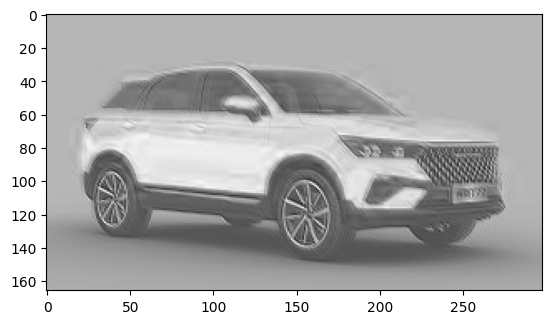

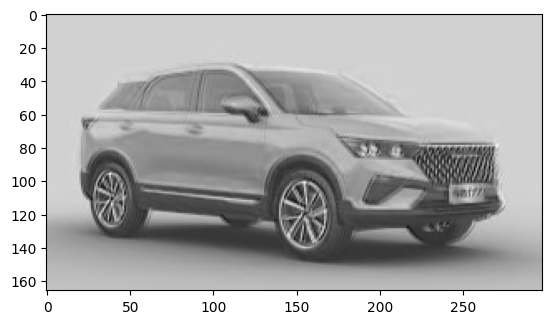

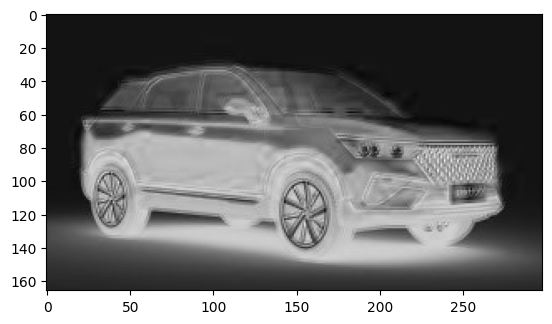

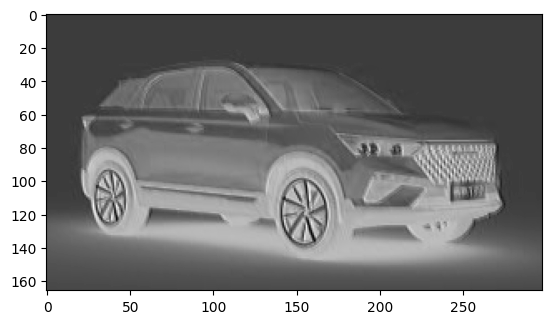

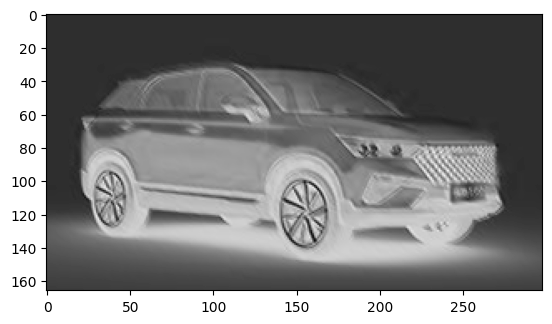

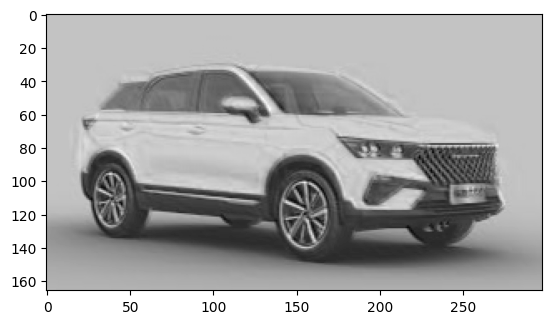

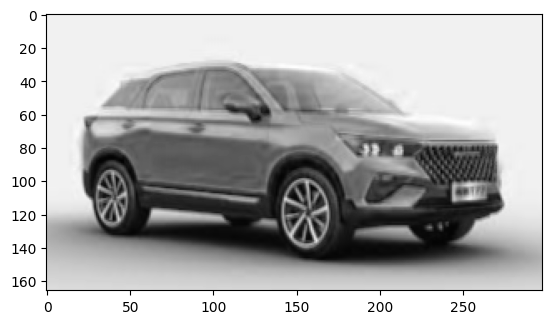

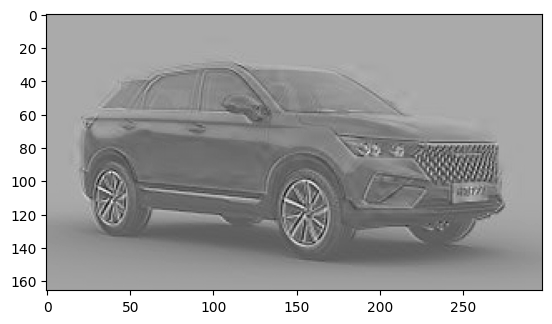

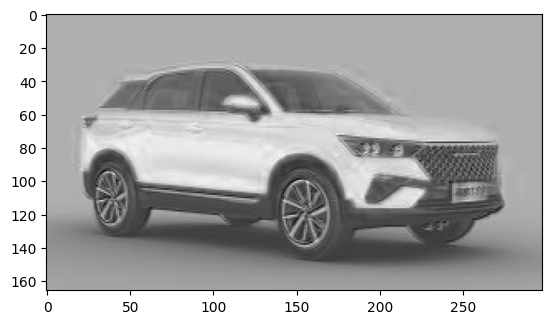

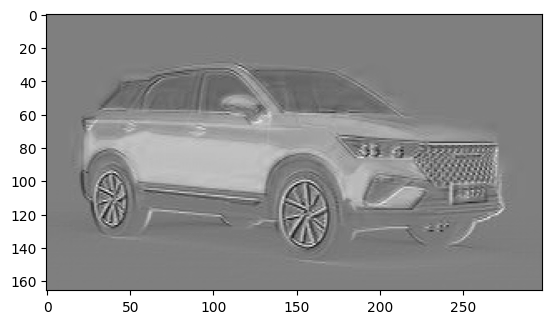

In [57]:
input_img=reshaping_in(color_car,grayscale=False)
model=get_conv_model(filters=10,filter_size=(3,3),strides=(1,1),input_shape=input_img.shape[1:])
apply_conv_model_and_visualize(input_img,model)

In [58]:
!mkdir -p ~/ .kaggle

In [59]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [60]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [61]:
!kaggle datasets download -d salader/dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [62]:
try:
  import evidently
  print("sucessfully imported")

except Exception as e:
  print(e)

No module named 'evidently'
